In [31]:
# Import Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [32]:
# Initialize the starships data
numberOfPages = 4
starshipsInfo  = []
for page in range(numberOfPages):
    starshipsURL = "http://swapi.dev/api/starships/?page="
    starshipsResponse = (requests.get(starshipsURL + str(page + 1)).json())["results"]
    for x in starshipsResponse:
        starshipsInfo.append(x)
print(starshipsInfo)


[{'name': 'CR90 corvette', 'model': 'CR90 corvette', 'manufacturer': 'Corellian Engineering Corporation', 'cost_in_credits': '3500000', 'length': '150', 'max_atmosphering_speed': '950', 'crew': '30-165', 'passengers': '600', 'cargo_capacity': '3000000', 'consumables': '1 year', 'hyperdrive_rating': '2.0', 'MGLT': '60', 'starship_class': 'corvette', 'pilots': [], 'films': ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/3/', 'http://swapi.dev/api/films/6/'], 'created': '2014-12-10T14:20:33.369000Z', 'edited': '2014-12-20T21:23:49.867000Z', 'url': 'http://swapi.dev/api/starships/2/'}, {'name': 'Star Destroyer', 'model': 'Imperial I-class Star Destroyer', 'manufacturer': 'Kuat Drive Yards', 'cost_in_credits': '150000000', 'length': '1,600', 'max_atmosphering_speed': '975', 'crew': '47,060', 'passengers': 'n/a', 'cargo_capacity': '36000000', 'consumables': '2 years', 'hyperdrive_rating': '2.0', 'MGLT': '60', 'starship_class': 'Star Destroyer', 'pilots': [], 'films': ['http://s

In [33]:
# Creating the starships DataFrames
starshipsData = pd.DataFrame(starshipsInfo)
starshipsData = starshipsData.rename(columns={'name' : 'Name', 
                                              'model' : 'Model', 
                                              'manufacturer' : 'Manufacturer', 
                                              'cost_in_credits' : 'Cost', 
                                              'length' : 'Length',
                                              'max_atmosphering_speed' : 'Max Speed', 
                                              'crew' : 'Crew', 
                                              'passengers' : 'Passengers', 
                                              'cargo_capacity' : 'Cargo Capacity',
                                              'consumables' : 'Consumables',
                                              'hyperdrive_rating' : 'Hyperdrive Rating', 
                                              'MGLT' : 'MGLT', 
                                              'starship_class' : 'Starship Class', 
                                              'pilots' : 'Pilots',
                                              'films' : 'Films',
                                              'created' : 'Created', 
                                              'edited' : 'Edited', 
                                              'url': 'URL'})


In [34]:
# Death Star DataFrame
deathstarData = starshipsData.loc[[3]]
deathstarData['Cost'] = deathstarData['Cost'].astype(float)
deathstarData['Length'] = deathstarData['Length'].astype(float)
deathstarData


,Name,Model,Manufacturer,Cost,Length,Max Speed,Crew,Passengers,Cargo Capacity,Consumables,Hyperdrive Rating,MGLT,Starship Class,Pilots,Films,Created,Edited,URL
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1.000000e+12,120000.0,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[http://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,http://swapi.dev/api/starships/9/


In [35]:
# Cleaning the starships DataFrame
starshipsData['Length'] = starshipsData['Length'].replace(',','',regex = True)
starshipsData = starshipsData.loc[starshipsData['Cost'] != 'unknown']
starshipsData = starshipsData.loc[(starshipsData['Name'] != 'Death Star') & (starshipsData['Name'] != 'Executor')]
starshipsData['Cost'] = starshipsData['Cost'].astype(float)
starshipsData['Length'] = starshipsData['Length'].astype(float)
starshipsData


,Name,Model,Manufacturer,Cost,Length,Max Speed,Crew,Passengers,Cargo Capacity,Consumables,Hyperdrive Rating,MGLT,Starship Class,Pilots,Films,Created,Edited,URL
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000.0,150.00,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[http://swapi.dev/api/films/1/, http://swapi.d...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,http://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000.0,1600.00,975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[http://swapi.dev/api/films/1/, http://swapi.d...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,http://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000.0,38.00,1000,5,75,180000,1 month,1.0,70,landing craft,[],[http://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,http://swapi.dev/api/starships/5/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000.0,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[http://swapi.dev/api/people/13/, http://swapi...","[http://swapi.dev/api/films/1/, http://swapi.d...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,http://swapi.dev/api/starships/10/
5,Y-wing,BTL Y-wing,Koensayr Manufacturing,134999.0,14.00,1000km,2,0,110,1 week,1.0,80,assault starfighter,[],"[http://swapi.dev/api/films/1/, http://swapi.d...",2014-12-12T11:00:39.817000Z,2014-12-20T21:23:49.883000Z,http://swapi.dev/api/starships/11/
6,X-wing,T-65 X-wing,Incom Corporation,149999.0,12.50,1050,1,0,110,1 week,1.0,100,Starfighter,"[http://swapi.dev/api/people/1/, http://swapi....","[http://swapi.dev/api/films/1/, http://swapi.d...",2014-12-12T11:19:05.340000Z,2014-12-20T21:23:49.886000Z,http://swapi.dev/api/starships/12/
11,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,240000.0,20.00,850,6,20,80000,2 months,1.0,50,Armed government transport,"[http://swapi.dev/api/people/1/, http://swapi....","[http://swapi.dev/api/films/2/, http://swapi.d...",2014-12-15T13:04:47.235000Z,2014-12-20T21:23:49.900000Z,http://swapi.dev/api/starships/22/
12,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8500000.0,300.00,800,854,75,6000000,2 years,2.0,40,Escort ship,[],"[http://swapi.dev/api/films/2/, http://swapi.d...",2014-12-15T13:06:30.813000Z,2014-12-20T21:23:49.902000Z,http://swapi.dev/api/starships/23/
13,Calamari Cruiser,MC80 Liberty type Star Cruiser,Mon Calamari shipyards,104000000.0,1200.00,n/a,5400,1200,unknown,2 years,1.0,60,Star Cruiser,[],[http://swapi.dev/api/films/3/],2014-12-18T10:54:57.804000Z,2014-12-20T21:23:49.904000Z,http://swapi.dev/api/starships/27/
14,A-wing,RZ-1 A-wing Interceptor,"Alliance Underground Engineering, Incom Corpor...",175000.0,9.60,1300,1,0,40,1 week,1.0,120,Starfighter,[http://swapi.dev/api/people/29/],[http://swapi.dev/api/films/3/],2014-12-18T11:16:34.542000Z,2014-12-20T21:23:49.907000Z,http://swapi.dev/api/starships/28/


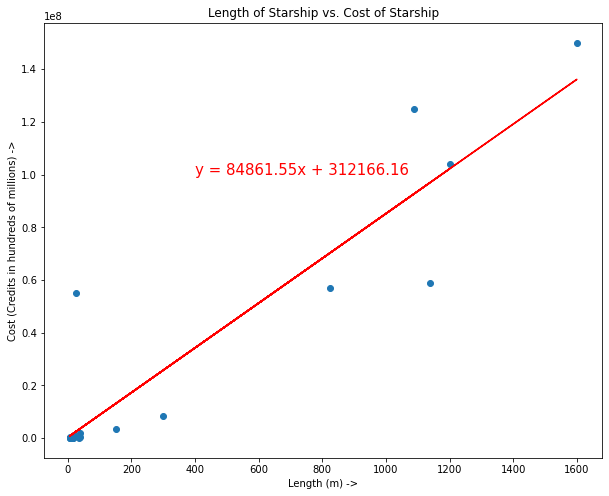

In [36]:
# Plot a scatter plot of length vs. cost
x_values = starshipsData['Length']
y_values = starshipsData['Cost']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(400,1e8),fontsize=15,color="red")
plt.xlabel('Length (m) ->')
plt.ylabel('Cost (Credits in hundreds of millions) ->')
plt.title('Length of Starship vs. Cost of Starship')
plt.savefig("Length_Cost_Scatter.png")
plt.show()


In [37]:
# Death Star Comparison
deathstar = slope*float(deathstarData['Length']) + intercept
compareData = pd.DataFrame({'Actual Cost (Credits in billions)':float(deathstarData['Cost'])/1e9,
                            'Estimated Cost (Credits in billions)':deathstar/1e9}, index={"Credits"})
costDifference = round(float(compareData['Actual Cost (Credits in billions)'])/float(compareData['Estimated Cost (Credits in billions)']),2)
print(f"The actual cost of the death star is {costDifference} times the estimated cost.")
print("Therefore, it can be concluded that the death star is overpriced.")
compareData


The actual cost of the death star is 98.2 times the estimated cost.
Therefore, it can be concluded that the death star is overpriced.


,Actual Cost (Credits in billions),Estimated Cost (Credits in billions)
Credits,1000.0,10.183698


In [38]:
# Death Star in comparison with planets
planetsComp = {'Death Star':float(deathstarData['Length']/1000),
               'Mercury':2439.7, 
               'Venus':6051.8, 
               'Earth':6371, 
               'Mars':3389.5, 
               'Jupiter':69911, 
               'Saturn':58232,
               'Uranus':25362, 
               'Neptune':24622}
creditsToUSD = 1.3


In [39]:
# Death Star Stats Continued
comparisonDF = pd.DataFrame.from_dict(planetsComp, orient='index')
comparisonDF = comparisonDF.rename(columns={0:'Length (km)'})
comparisonDF['Amount of Death Stars'] = comparisonDF['Length (km)'] / planetsComp['Death Star']
comparisonDF['Cost (Credits in trillions)'] = (comparisonDF['Amount of Death Stars'] * float(deathstarData['Cost'])) / 1e12
comparisonDF['Cost (USD in trillions)'] = comparisonDF['Cost (Credits in trillions)'] * creditsToUSD
comparisonDF


,Length (km),Amount of Death Stars,Cost (Credits in trillions),Cost (USD in trillions)
Death Star,120.0,1.000000,1.000000,1.300000
Mercury,2439.7,20.330833,20.330833,26.430083
Venus,6051.8,50.431667,50.431667,65.561167
Earth,6371.0,53.091667,53.091667,69.019167
Mars,3389.5,28.245833,28.245833,36.719583
Jupiter,69911.0,582.591667,582.591667,757.369167
Saturn,58232.0,485.266667,485.266667,630.846667
Uranus,25362.0,211.350000,211.350000,274.755000
Neptune,24622.0,205.183333,205.183333,266.738333


The Death Star size is smaller than all the planets in solar system


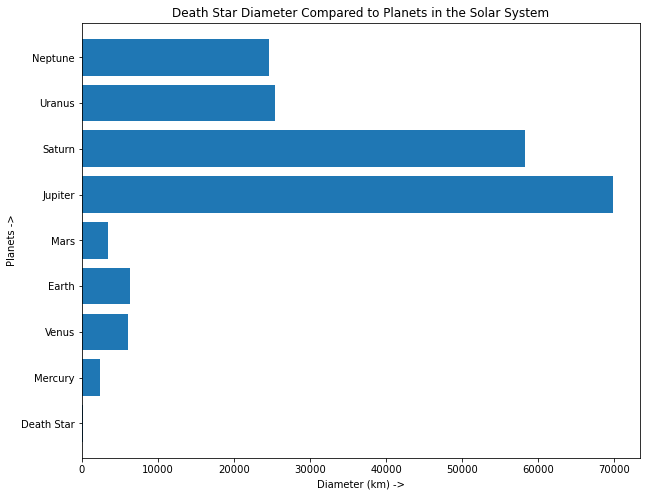

In [40]:
# Plot Death Star Diameter Compared to Planets in the Solar System
bottomRow = np.arange(len(comparisonDF))
plt.figure(figsize=(10,8))
plt.barh(bottomRow, comparisonDF['Length (km)'], align="center")
plt.yticks(bottomRow, comparisonDF.index)
plt.ylim(-0.75, len(bottomRow)-0.25)

plt.ylabel("Planets ->")
plt.xlabel("Diameter (km) ->")
plt.title('Death Star Diameter Compared to Planets in the Solar System')
print("The Death Star size is smaller than all the planets in solar system")


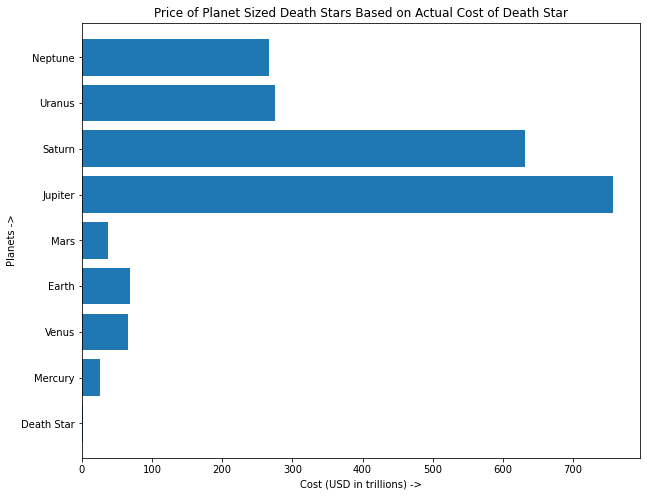

In [41]:
# Plot Price of Planet Sized Death Stars Based on Actual Cost of Death Star
bottomRow = np.arange(len(comparisonDF))
plt.figure(figsize=(10,8))
plt.barh(bottomRow, comparisonDF['Cost (USD in trillions)'], align="center")
plt.yticks(bottomRow, comparisonDF.index)
plt.ylim(-0.75, len(bottomRow)-0.25)

plt.ylabel("Planets ->")
plt.xlabel("Cost (USD in trillions) ->")
plt.title('Price of Planet Sized Death Stars Based on Actual Cost of Death Star')
plt.savefig('Planets_Death_Star_Bar.png')